<a href="https://colab.research.google.com/github/stephenbeckr/time-series-class/blob/main/Code/RegressionExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Example
Review for beginning of the semester (for time series class)

Demo developed by Will Kleiber
Data: Global SST anomalies, http://www.cru.uea.ac.uk/cru/data/temperature/ (see Kennedy et al 2011)

(SST = Sea Surface Temperature)

In [56]:
load(url("https://github.com/stephenbeckr/time-series-class/raw/main/Data/SST.RData"))

print("Variables:")
ls()
print("sst variable:")
head(sst)
tail(sst)

print("year variable")
head(year)
tail(year)

[1] "Variables:"


[1] "beta.hat"      "fitted.values" "lm.sst"        "lm.sst2"      
 [5] "lm.sst3"       "model"         "n"             "new"          
 [9] "preds"         "pres"          "sigma2.hat"    "sst"          
[13] "sst.resid"     "sst.short"     "t"             "X"            
[17] "year"          "year_grid"     "year.short"

[1] "sst variable:"


[1] -0.315 -0.191 -0.185 -0.217 -0.247 -0.213

[1] 0.296 0.259 0.395 0.406 0.290 0.346

[1] "year variable"


[1] 1850 1851 1852 1853 1854 1855

[1] 2007 2008 2009 2010 2011 2012

#### Basic plot

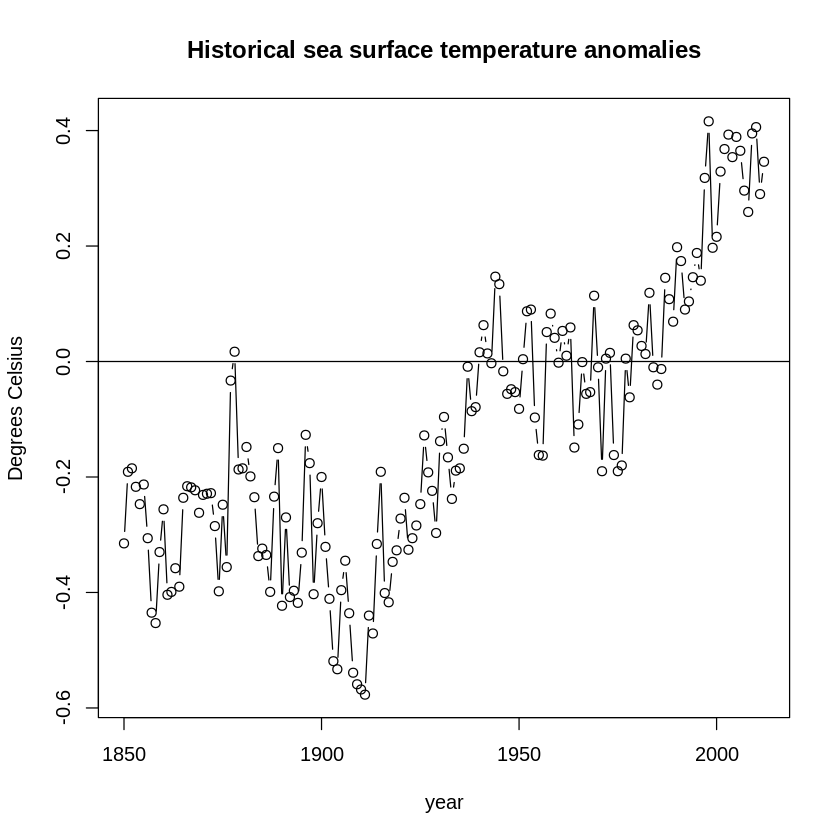

In [4]:
plot(sst~year,type="b",main="Historical sea surface temperature anomalies", ylab="Degrees Celsius")
abline(h=0)

### First linear model
$$ \text{SST} = \beta_0 + \beta_1 \cdot \text{year} + \epsilon$$

We'll first solve this by hand (not recommended outside of a classroom) and then also show how to do it using R's `lm` linear model package

In [3]:
n     <- length(sst) # number of years in dataset

# Design matrix: [1,year]
X     <- matrix(nr=n,nc=2)
X[,1] <- 1
X[,2] <- year

head(X)
tail(X)

1,1850
1,1851
1,1852
1,1853
1,1854
1,1855


"[158,]",1,2007
"[159,]",1,2008
"[160,]",1,2009
"[161,]",1,2010
"[162,]",1,2011
"[163,]",1,2012


In [5]:
# Estimate (beta0,beta1)
beta.hat <- solve(t(X) %*% X) %*% t(X) %*% sst  # t() is transpose
beta.hat

beta.hat[2] * 100 # average increase in SST in 100 years (degrees Celsius)



-7.715405648
0.003932274


[1] 0.3932274

Add these fitted lines to the plot

-0.4406983
-0.4367660
-0.4328337
-0.4289014
-0.4249692
-0.4210369
-0.4171046
-0.4131723
-0.4092401
-0.4053078
-0.4013755


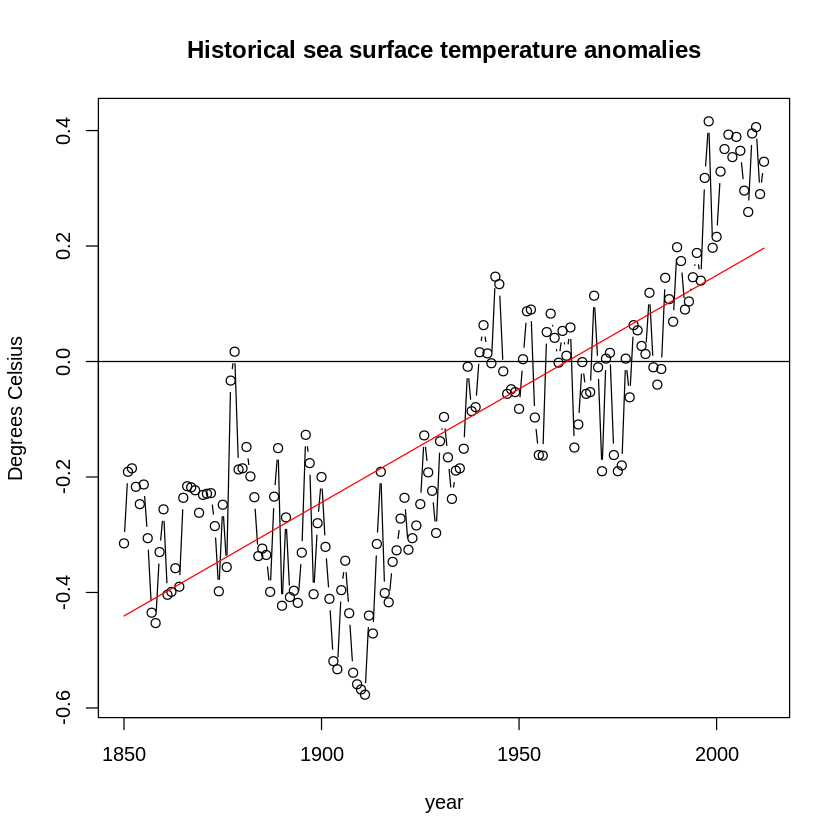

In [6]:
fitted.values <- X %*% beta.hat
fitted.values

plot(sst~year,type="b",main="Historical sea surface temperature anomalies", ylab="Degrees Celsius")
abline(h=0)
lines(fitted.values~year,col="red")

In [7]:
# Estimate sigma^2 (residual variance, Var(eps) = sigma^2)
sigma2.hat <- sum( (sst - (beta.hat[1] + beta.hat[2] * year))^2 ) / (n - 2)
print("Estimated standard deviation is")
sqrt(sigma2.hat)

[1] "Estimated standard deviation is"


[1] 0.1438753

#### Now repeat, letting R do the heavy lifting

`lm` is in the `stats` package, usually pre-installed

In [11]:
lm.sst <- lm(sst~year) # automatically includes intercept... can remove via lm(sst~year-1)
lm.sst

# compare betas
print("Beta from the lm package:")
lm.sst$coef
print("Beta found by hand:")
beta.hat

# compare sigmas
print("std from the lm package:")
summary(lm.sst)$sigma
print("std found by hand:")
sqrt(sigma2.hat)


Call:
lm(formula = sst ~ year)

Coefficients:
(Intercept)         year  
  -7.715406     0.003932  


[1] "Beta from the lm package:"


(Intercept)         year 
-7.715405648  0.003932274

[1] "Beta found by hand:"


-7.715405648
0.003932274


[1] "std from the lm package:"


[1] 0.1438753

[1] "std found by hand:"


[1] 0.1438753

In [12]:
print("Summary info from lm package")
summary(lm.sst) # note p-values, standard errors, r^2, etc.

[1] "Summary info from lm package"



Call:
lm(formula = sst ~ year)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37617 -0.09872  0.00327  0.10339  0.34759 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.7154056  0.4626098  -16.68   <2e-16 ***
year         0.0039323  0.0002395   16.42   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1439 on 161 degrees of freedom
Multiple R-squared:  0.6261,	Adjusted R-squared:  0.6238 
F-statistic: 269.6 on 1 and 161 DF,  p-value: < 2.2e-16


and some default plots

null device 
          1

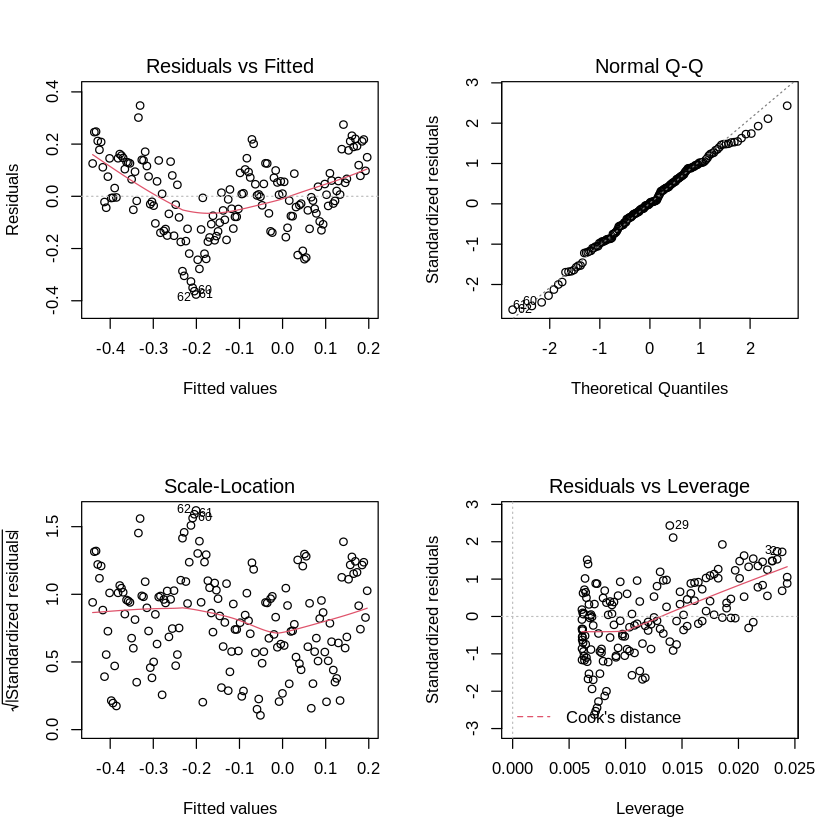

In [13]:
par(mfrow=c(2,2)) # set up a 2x2 window for four plots
plot(lm.sst) # whoa, powerful!

# looking at the (1,1) plot, Residuals vs. Fitted, how is our assumption of iid errors?
dev.off() # manually kill plotting device (no more annotations allowed; do this for performance reasons sometimes)


## Let's look at residuals in detail
i.e., residuals are $y - \hat{y}$

If our assumptions are correct, these should look like normally distributed and independent noise

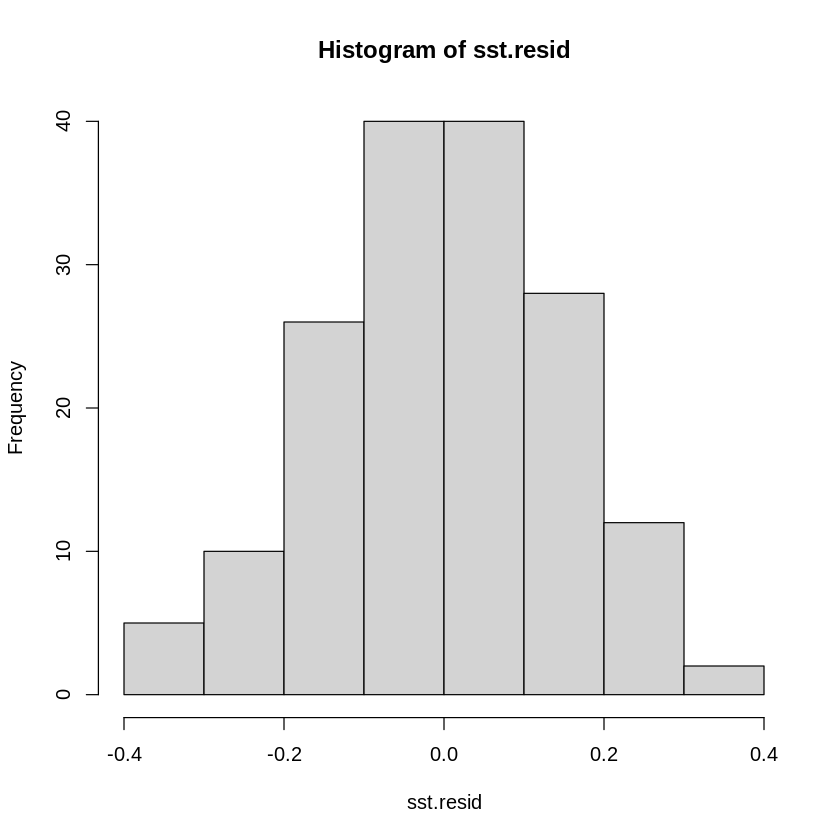

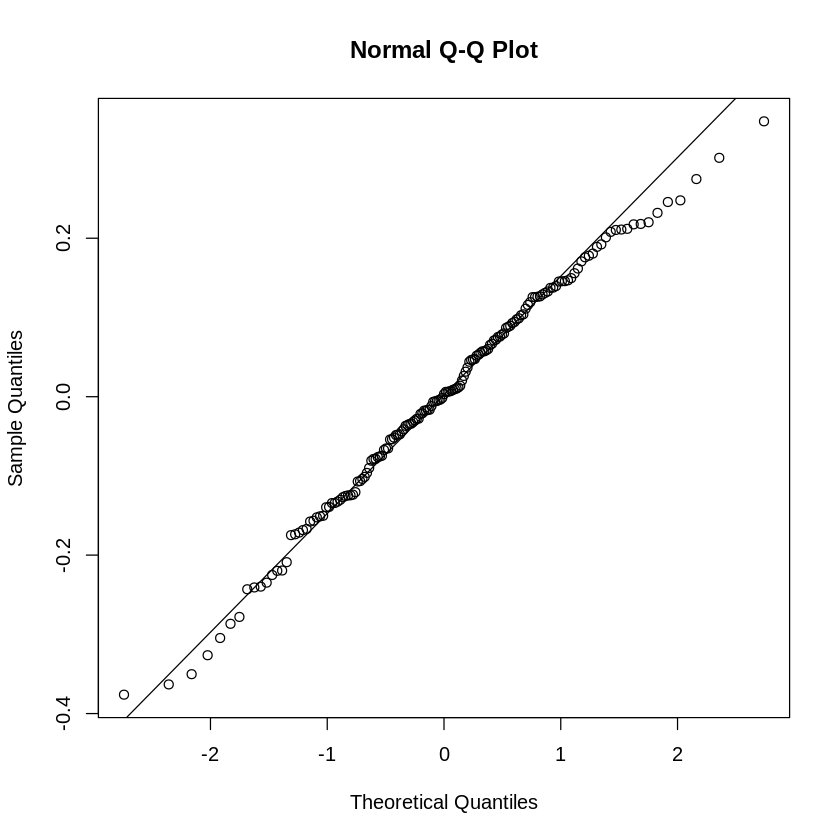

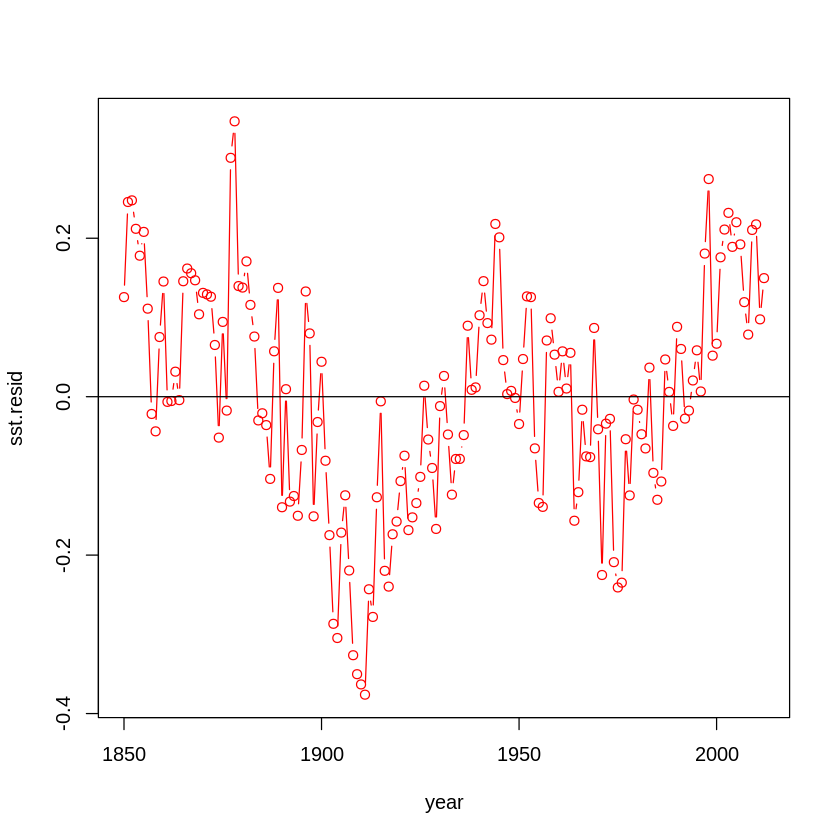

In [14]:
## Estimated residuals (y - y.hat)
## (if our assumptions are correct, these should look like normally distributed noise)
sst.resid <- lm.sst$resid

hist(sst.resid)
qqnorm(sst.resid)
qqline(sst.resid)

plot(sst.resid~year,col="red",type="b")
abline(h=0)

It looks plausible that the residuals are **normal**, but not that they are **independent** since that last plot has a clear dependence

So, let's try going beyond a linear model:
$$ \text{SST} = \beta_0 + \beta_1 \cdot \text{year} + \beta_2\cdot\text{year}^2 + \epsilon$$


Call:
lm(formula = sst ~ poly(year, degree = 2))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30298 -0.07781 -0.00106  0.07866  0.32359 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -0.122184   0.009375 -13.032  < 2e-16 ***
poly(year, degree = 2)1  2.362253   0.119698  19.735  < 2e-16 ***
poly(year, degree = 2)2  1.019957   0.119698   8.521 1.11e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1197 on 160 degrees of freedom
Multiple R-squared:  0.7428,	Adjusted R-squared:  0.7396 
F-statistic:   231 on 2 and 160 DF,  p-value: < 2.2e-16


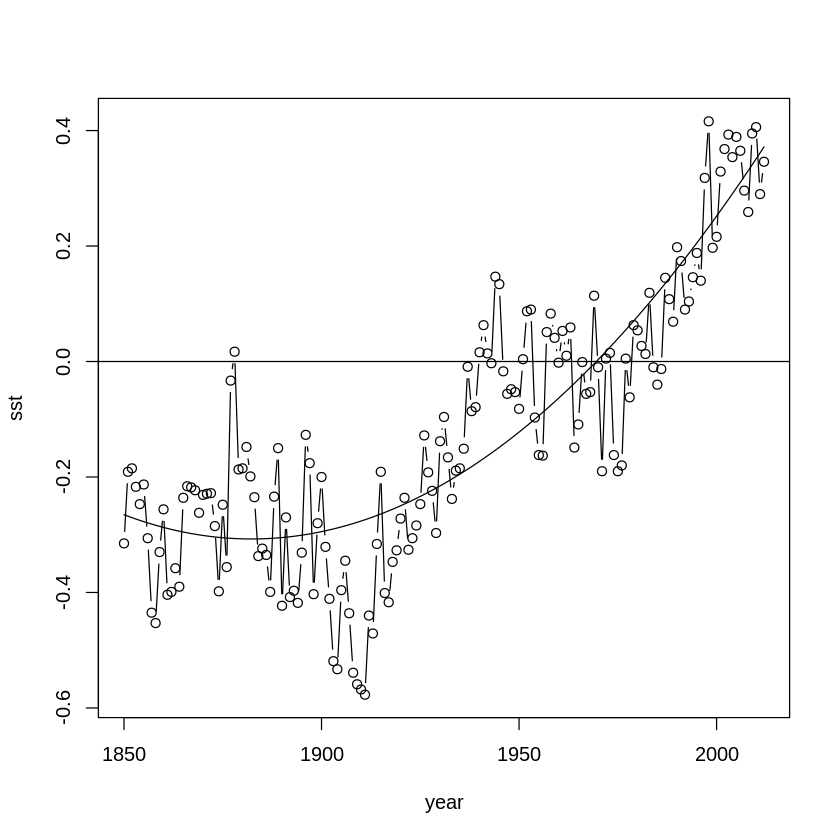

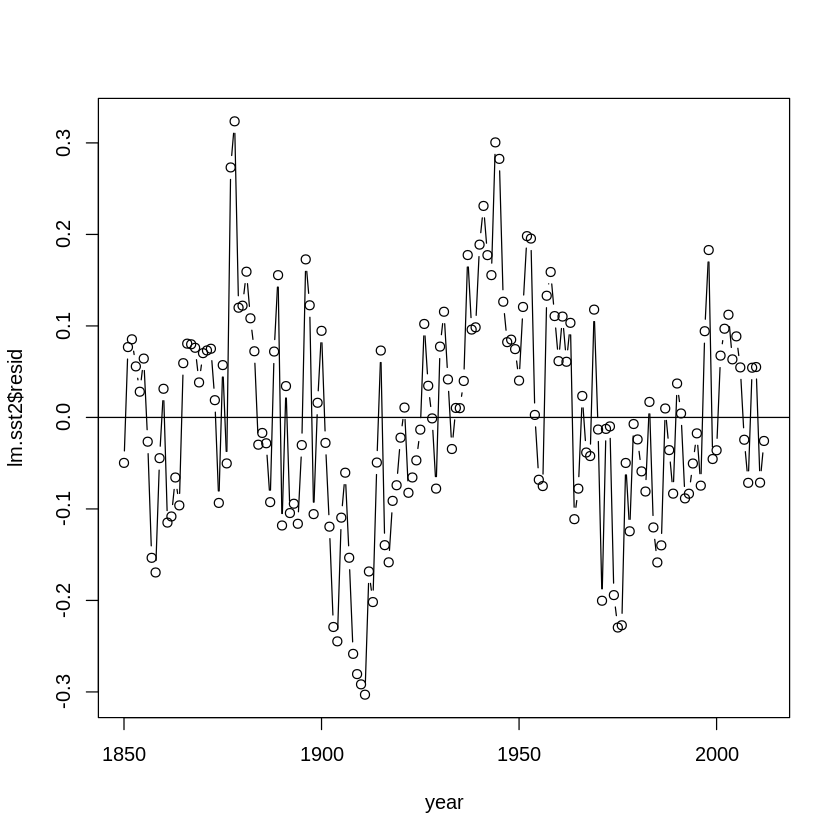

In [15]:
lm.sst2 <- lm(sst~poly(year,degree=2))
summary(lm.sst2)

plot(sst~year,type="b")
abline(h=0)
lines(lm.sst2$fitted~year)

plot(lm.sst2$resid~year,type="b")
abline(h=0)

The residuals still have some correlation.  Let's try an even higher degree polynomial!

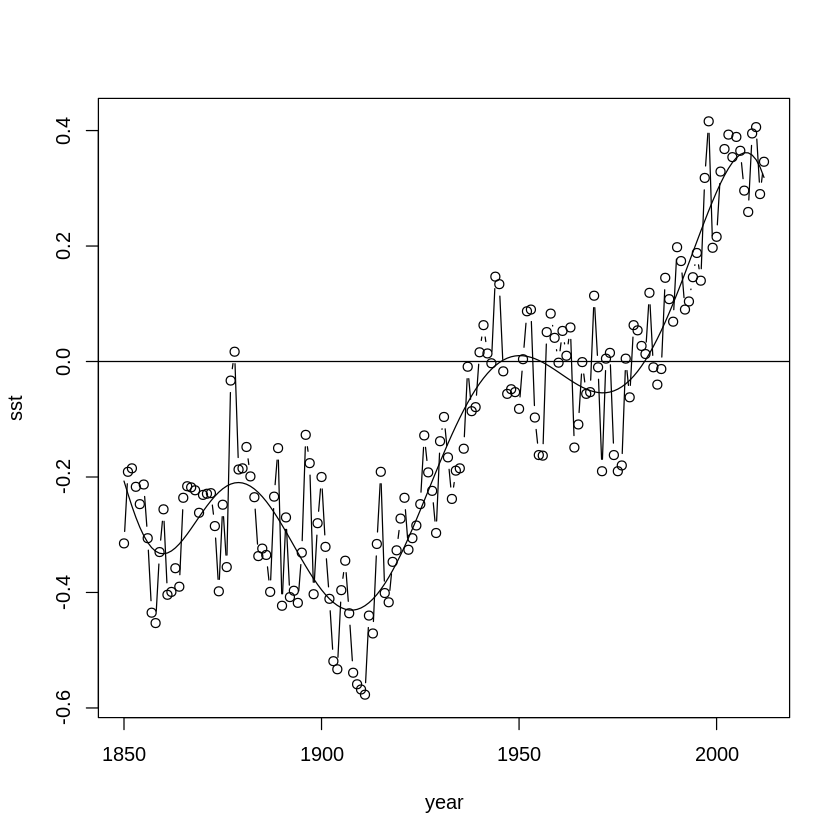

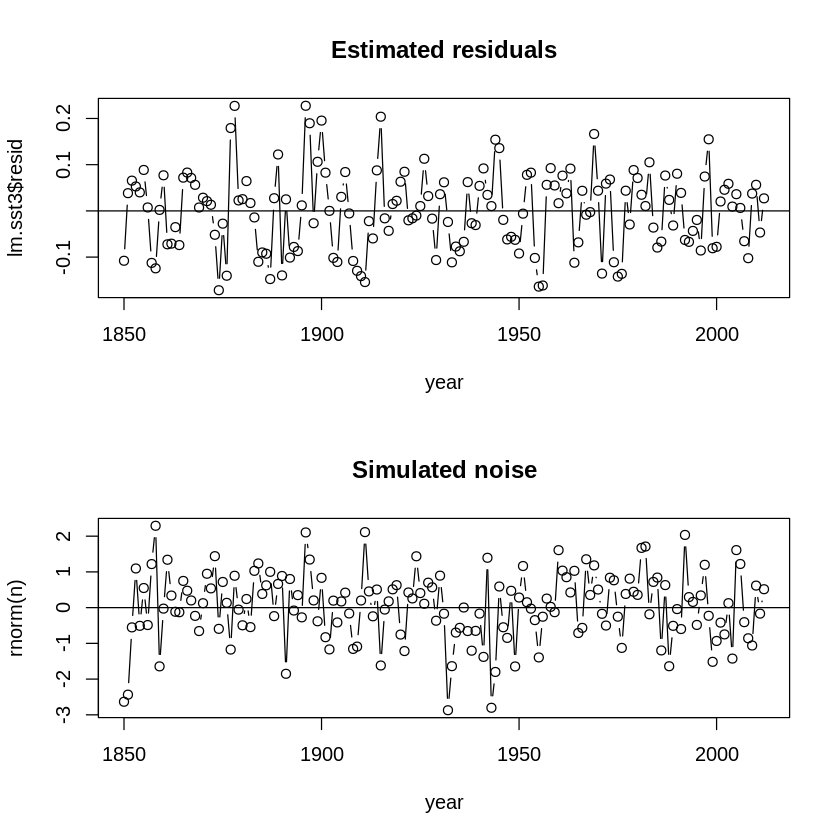

In [17]:
lm.sst3 <- lm(sst~poly(year,degree=10))

plot(sst~year,type="b")
abline(h=0)
lines(lm.sst3$fitted~year)

par(mfrow=c(2,1))
plot(lm.sst3$resid~year,type="b",main="Estimated residuals")
abline(h=0)
# compare to noise:
plot(rnorm(n)~year,type="b",main="Simulated noise")
abline(h=0)

How can we tell if there is remaining structure in the estimated residuals?

i.e., is a time series model necessary?  and if so, how do we build one?

That's the goal of this class

## Overfitting

Why not use a very high degree polynomial?

John von Neumann: "With four parameters I can fit an elephant, and with five I can make him wiggle his trunk."

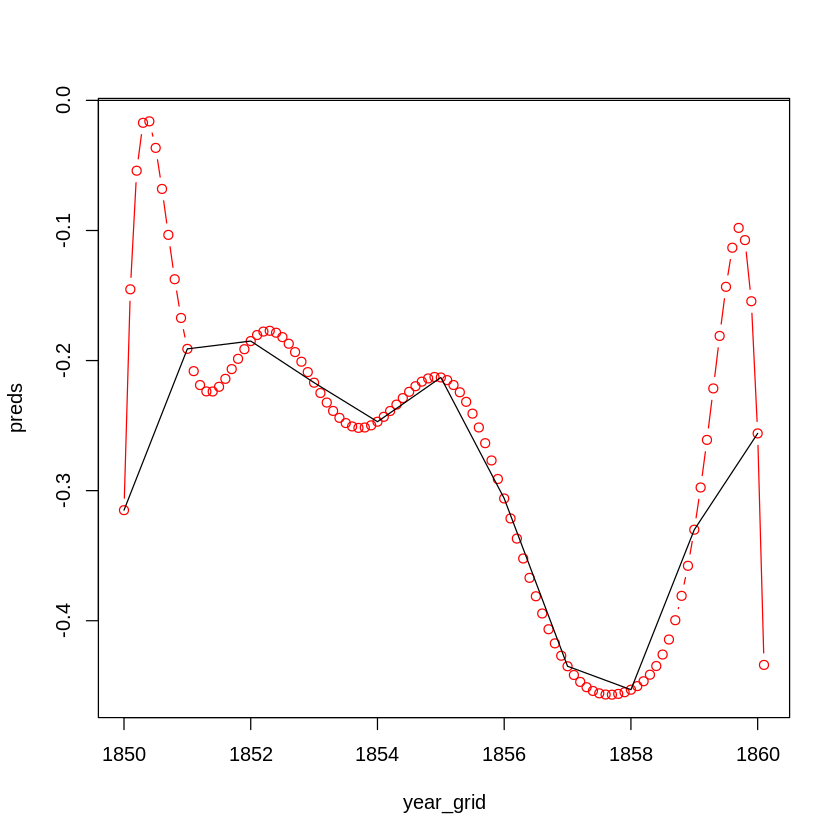

In [52]:
# Let's only work with the first t years
t <- 11
sst.short = sst[1:t]
year.short= year[1:t]

model <- lm(sst.short~poly(year.short,degree=10))

year_grid = seq( year[1], year[t]+.1, 0.1)
preds = predict( model, newdata = list(year.short = year_grid))

plot(year_grid,preds,type="b",col="red")
abline(h=0)
lines(model$fitted~year.short)

In [55]:
predict( model, newdata = list(year.short = 1860))

predict( model, newdata = list(year.short = 1861))

predict( model, newdata = list(year.short = 1862))

1 
-0.256

1 
-12.921

1 
-132.235

Our model has overfit! It has no explanatory power for new unseen data.

Our residuals (for in-sample data) look great though:

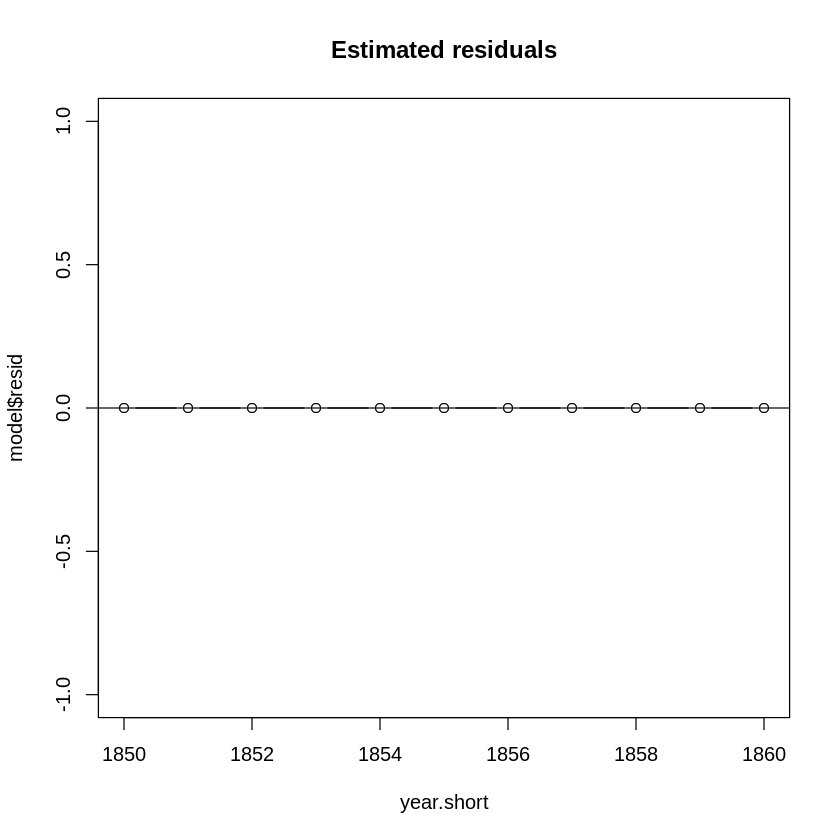

In [49]:
plot(model$resid~year.short,type="b",main="Estimated residuals")
abline(h=0)